In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
#sns.set(style="white", palette="muted", color_codes=True)

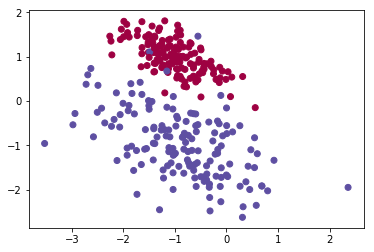

In [16]:
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=60)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [18]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [19]:
# np.c_[y_test, y_pred]

In [20]:
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred))
print("Recall: %f" % metrics.recall_score(y_test, y_pred))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.986667
Precision: 1.000000
Recall: 0.973684
F1-score: 0.986667


In [21]:
metrics.confusion_matrix(y_test, y_pred)

array([[37,  0],
       [ 1, 37]], dtype=int64)

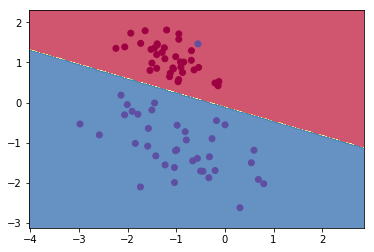

In [22]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
plt.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=plt.cm.Spectral)